# CLEANING DATA OFF

In [ ]:
# Select algorithm to use as machine learner
# 0 = Linear Regression
# 1 = SVR  (not recommended - too slow)
# 2 = Decision Tree
# 3 = Random Forest
# 4 = XGBoost

algorithm_choice = 0

In [18]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print "Import successful"

Import successful


In [5]:
try:
    data = pd.io.parsers.read_csv('train_clean.csv')
    
    print "Russian housing training dataset has {} samples with {} features each.".format(*data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Russian housing training dataset has 30471 samples with 97 features each.


In [6]:
try:
    data_test = pd.io.parsers.read_csv('test_clean.csv')
    
    print "Russian housing training dataset has {} samples with {} features each.".format(*data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Russian housing training dataset has 30471 samples with 97 features each.


In [7]:
print "Display sample of training data:"
display(data.head())

Display sample of training data:


,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,mkad_km,public_transport_station_min_walk,incineration_km,cafe_sum_1500_min_price_avg,office_sqm_1500,build_count_monolith,school_quota,prom_part_1000,id,price_doc
0,43.0,27.0,4.0,NaN,NaN,3,1,NaN,NaN,NaN,...,1.422391,3.299822,3.633334,566.67,39554,2.0,11065.0,0.00,1,5850000
1,34.0,19.0,3.0,NaN,NaN,3,2,NaN,NaN,NaN,...,9.503405,0.783160,8.648587,694.12,102910,4.0,6237.0,0.07,2,6000000
2,43.0,29.0,2.0,NaN,NaN,3,2,NaN,NaN,NaN,...,5.604800,3.945073,11.996480,516.67,0,4.0,5580.0,0.29,3,5700000
3,89.0,50.0,9.0,NaN,NaN,39,1,NaN,NaN,NaN,...,2.677824,1.579164,14.317640,673.91,11000,50.0,17063.0,10.35,4,13100000
4,77.0,77.0,4.0,NaN,NaN,39,5,NaN,NaN,NaN,...,11.616653,0.857764,11.903910,766.80,1195735,16.0,7770.0,8.29,5,16331452


In [8]:
print "Display statistics about training data:"
display(data.describe())


Display statistics about training data:


,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,mkad_km,public_transport_station_min_walk,incineration_km,cafe_sum_1500_min_price_avg,office_sqm_1500,build_count_monolith,school_quota,prom_part_1000,id,price_doc
count,30471.000000,24088.000000,30304.000000,1.686600e+04,20899.000000,30471.000000,30471.000000,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,26272.000000,3.047100e+04,25480.000000,23786.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,3.068057e+03,12.558974,860.920121,210.401365,6.399301,1.909804,2.107025,...,6.274764,4.969626,10.884613,714.064298,1.403712e+05,12.043642,8324.970739,8.783209,15236.000000,7.123035e+06
std,38.031487,52.285733,5.319989,1.543878e+05,6.756550,376.290762,110.998142,28.265979,0.851805,0.880148,...,5.142492,15.269861,6.789709,192.259841,3.016844e+05,19.278997,4289.734174,11.517722,8796.364363,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,...,0.013626,0.033646,0.198071,300.000000,0.000000e+00,0.000000,1012.000000,0.000000,1.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,1.967000e+03,9.000000,545.000000,126.000000,1.000000,1.000000,1.000000,...,2.633404,1.215747,6.221938,585.710000,0.000000e+00,2.000000,5782.000000,0.000000,7618.500000,4.740002e+06
50%,49.000000,30.000000,6.500000,1.979000e+03,12.000000,839.000000,194.000000,6.000000,2.000000,2.000000,...,5.467510,1.923301,10.324170,692.310000,1.665000e+04,6.000000,7377.000000,4.020000,15236.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,2.005000e+03,17.000000,1143.000000,269.000000,9.000000,2.000000,3.000000,...,8.184752,3.340836,13.393815,821.430000,1.173000e+05,13.000000,9891.000000,12.620000,22853.500000,8.300000e+06
max,5326.000000,7478.000000,77.000000,2.005201e+07,117.000000,1705.000000,627.000000,2014.000000,19.000000,33.000000,...,53.277832,208.956022,58.632050,2500.000000,2.908344e+06,127.000000,24750.000000,72.200000,30471.000000,1.111111e+08


# IMPORTANT NOTES ABOUT FEATURES
THESE ARE SOME OF THE SUMMARY NOTES GAINED FROM KAGGLE DISCUSSIONS, QUESTIONS AND ANSWERS FROM SBERBANK

* CHECK LIFE SQ, FULL SQ, KITCH SQ FOR CONSISTENCY (DONE)
* BUILD YEAR CAN BE IN FUTURE - PRE INVESTMENT TYPE (DONE)
* BUILD YEAR 0 AND 1 ARE MISTAKES (DONE)
* CHECK TRAIN AND TEST PRODUCT TYPES (DONE)
* CHECK NUM OF ROOMS FOR CONSISTENCY (DONE)
* MATERIAL EXPLAINED: 1 - panel, 2 - brick, 3 - wood, 4 - mass concrete, 5 - breezeblock, 6 - mass concrete plus brick
* STATE EXPLAINED: 4 BEST 1 WORST
* KITCHEN INCLUDED IN LIFE SQ CHECK INCONSISTENCY (DONE)
* FULL SQ > LIFE SQ (MOST PROBABLY) (DONE)
* KM DISTANCES ARE AIRLINE DISTANCES
* RAION POPUL AND FULL ALL ARE SAME CALC FROM DIFF SOURCES

In [10]:
#remove unwanted columns and subset the 40 final features


train_data_features = data[['full_sq', 'life_sq','floor','build_year','max_floor','month_year_cnt','week_year_cnt'
,'kitch_sq','num_room','state','kindergarten_km','radiation_km','school_km','material','metro_min_avto','railroad_km'
,'industrial_km','green_zone_km','theater_km','swim_pool_km','big_church_km','water_km','railroad_station_walk_km','hospice_morgue_km'
,'mosque_km','cemetery_km','fitness_km','nuclear_reactor_km','church_synagogue_km','park_km','green_part_500',
'hospital_beds_raion',
'market_shop_km',
'thermal_power_plant_km',
'sadovoe_km',
'ice_rink_km',
'water_treatment_km',
'office_sqm_500',
'green_part_1500',
'preschool_quota','price_doc']]
print "Russian housing train_data_features dataset has {} samples with {} features each.".format(*train_data_features.shape)

Russian housing train_data_features dataset has 30471 samples with 41 features each.


In [11]:
test_data_features = data_test[['full_sq', 'life_sq','floor','build_year','max_floor','month_year_cnt','week_year_cnt'
,'kitch_sq','num_room','state','kindergarten_km','radiation_km','school_km','material','metro_min_avto','railroad_km'
,'industrial_km','green_zone_km','theater_km','swim_pool_km','big_church_km','water_km','railroad_station_walk_km','hospice_morgue_km'
,'mosque_km','cemetery_km','fitness_km','nuclear_reactor_km','church_synagogue_km','park_km','green_part_500',
'hospital_beds_raion',
'market_shop_km',
'thermal_power_plant_km',
'sadovoe_km',
'ice_rink_km',
'water_treatment_km',
'office_sqm_500',
'green_part_1500',
'preschool_quota']]
print "Russian housing test_data_features dataset has {} samples with {} features each.".format(*test_data_features.shape)

Russian housing test_data_features dataset has 7662 samples with 40 features each.


In [12]:
print "Display statistics about training data:"
display(train_data_features.describe())

Display statistics about training data:


,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,hospital_beds_raion,market_shop_km,thermal_power_plant_km,sadovoe_km,ice_rink_km,water_treatment_km,office_sqm_500,green_part_1500,preschool_quota,price_doc
count,30471.000000,24088.000000,30304.000000,1.686600e+04,20899.000000,30471.000000,30471.000000,20899.000000,20899.000000,16912.000000,...,16030.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,3.068057e+03,12.558974,860.920121,210.401365,6.399301,1.909804,2.107025,...,1190.738677,3.958882,7.340116,14.056721,6.123672,11.167613,13983.384333,19.197470,3271.272464,7.123035e+06
std,38.031487,52.285733,5.319989,1.543878e+05,6.756550,376.290762,110.998142,28.265979,0.851805,0.880148,...,1057.015001,3.447536,5.619330,8.343162,4.667856,7.036351,42610.018480,14.200273,2169.759592,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.003847,0.400563,0.000355,0.000000,0.274139,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,1.967000e+03,9.000000,545.000000,126.000000,1.000000,1.000000,1.000000,...,520.000000,1.543631,3.770411,8.346336,3.043924,5.304559,0.000000,8.470000,1874.000000,4.740002e+06
50%,49.000000,30.000000,6.500000,1.979000e+03,12.000000,839.000000,194.000000,6.000000,2.000000,2.000000,...,990.000000,2.927417,5.892381,12.748712,5.546687,10.378040,0.000000,14.950000,2854.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,2.005000e+03,17.000000,1143.000000,269.000000,9.000000,2.000000,3.000000,...,1786.000000,5.485423,9.818719,18.716620,7.956727,16.791370,0.000000,26.690000,4050.000000,8.300000e+06
max,5326.000000,7478.000000,77.000000,2.005201e+07,117.000000,1705.000000,627.000000,2014.000000,19.000000,33.000000,...,4849.000000,41.103651,56.856147,68.853047,46.037198,47.591240,611015.000000,90.410000,11926.000000,1.111111e+08


life_sq       0.264987
floor         0.005511
build_year    0.806652
max_floor     0.458012
kitch_sq      0.458012
dtype: float64

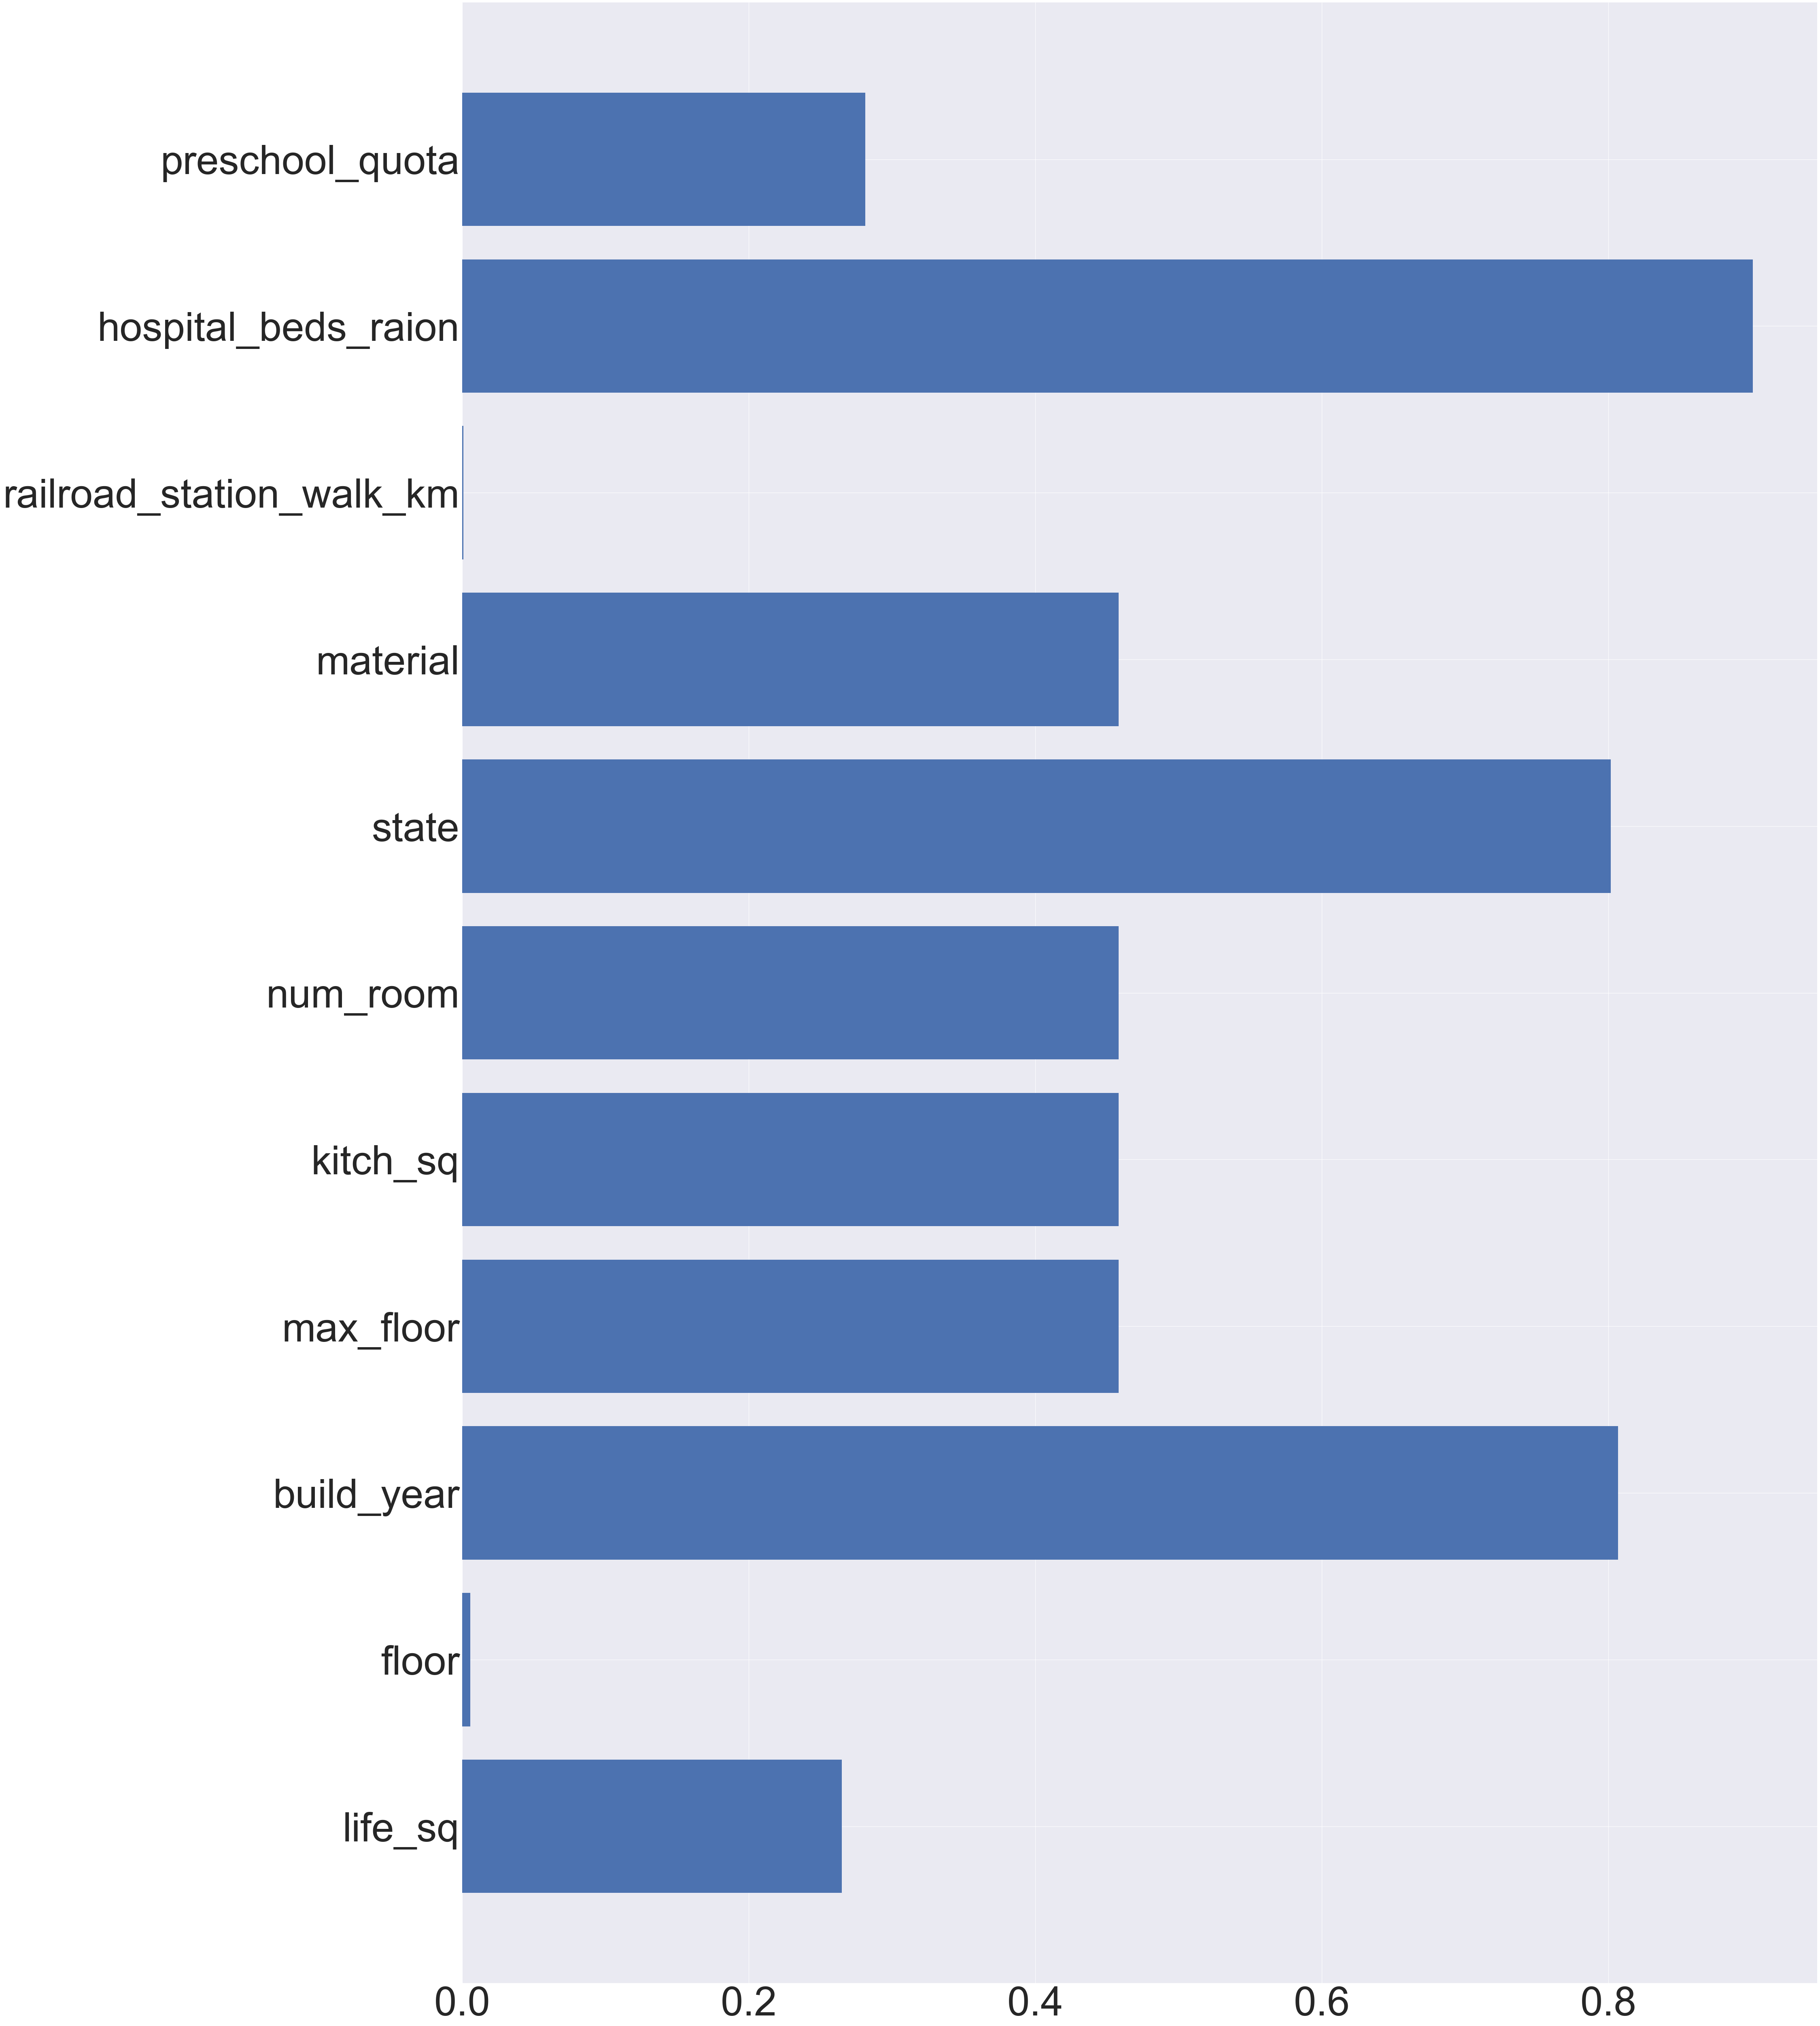

In [22]:
# train_data_features missing value plot

nan_counts = train_data_features.isnull().sum()
nan_ratios = nan_counts / train_data_features.count()
nan_ratios.columns = ["Feature", "Ratio NaN"]
nan_ratios = nan_ratios[nan_ratios > 0]
display(nan_ratios.head())

plt.figure(1)
plt.figure(figsize = (60,90))
plt.tick_params(axis='both', which='major', labelsize=100)
ind = np.arange(nan_ratios.count())
plt.yticks(ind, nan_ratios.index)
plt.barh(ind, nan_ratios, align = "center")
plt.show()

In [23]:
print "Display sample of train_data_features :"
display(train_data_features.head())

Display sample of train_data_features :


,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,hospital_beds_raion,market_shop_km,thermal_power_plant_km,sadovoe_km,ice_rink_km,water_treatment_km,office_sqm_500,green_part_1500,preschool_quota,price_doc
0,43.0,27.0,4.0,NaN,NaN,3,1,NaN,NaN,NaN,...,240.0,1.676258,5.814135,13.100618,1.107594,23.683460,0,14.27,5001.0,5850000
1,34.0,19.0,3.0,NaN,NaN,3,2,NaN,NaN,NaN,...,229.0,3.424716,3.419574,6.444333,8.972823,1.317476,0,21.53,3119.0,6000000
2,43.0,29.0,2.0,NaN,NaN,3,2,NaN,NaN,NaN,...,1183.0,1.375443,3.682455,6.963403,1.978517,4.912660,0,9.92,1463.0,5700000
3,89.0,50.0,9.0,NaN,NaN,39,1,NaN,NaN,NaN,...,NaN,0.811275,11.178333,17.457198,6.483172,15.623710,0,28.38,6839.0,13100000
4,77.0,77.0,4.0,NaN,NaN,39,5,NaN,NaN,NaN,...,562.0,1.969738,4.587917,0.046810,3.975401,10.683540,293699,4.12,3240.0,16331452


#### CORRECTIONS RULES FOR FULL_SQ AND LIFE_SQ (APPLY TO TRAIN AND TEST):
 * IF LIFE SQ >= FULL SQ MAKE FULL SQ NP.NAN
 * IF LIFE SQ < 5 NP.NAN
 * IF FULL SQ < 5 NP.NAN 
 * KITCH SQ < LIFE SQ
 * IF KITCH SQ == 0 OR 1 NP.NAN
 * CHECK FOR OUTLIERS IN LIFE SQ, FULL SQ AND KITCH SQ
 * LIFE SQ / FULL SQ MUST BE CONSISTENCY (0.3 IS A CONSERVATIVE RATIO)

In [16]:
train_data_features.loc[:, train_data_features.isnull().any()]

,life_sq,floor,build_year,max_floor,kitch_sq,num_room,state,material,railroad_station_walk_km,hospital_beds_raion,preschool_quota
0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.419893,240.0,5001.0
1,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.411993,229.0,3119.0
2,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.277658,1183.0,1463.0
3,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4.291432,NaN,6839.0
4,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.853960,562.0,3240.0
5,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.375312,NaN,852.0
6,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.603671,4849.0,933.0
7,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.309575,240.0,5001.0
8,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.540958,1894.0,3272.0
9,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,2.522422,2620.0,4050.0


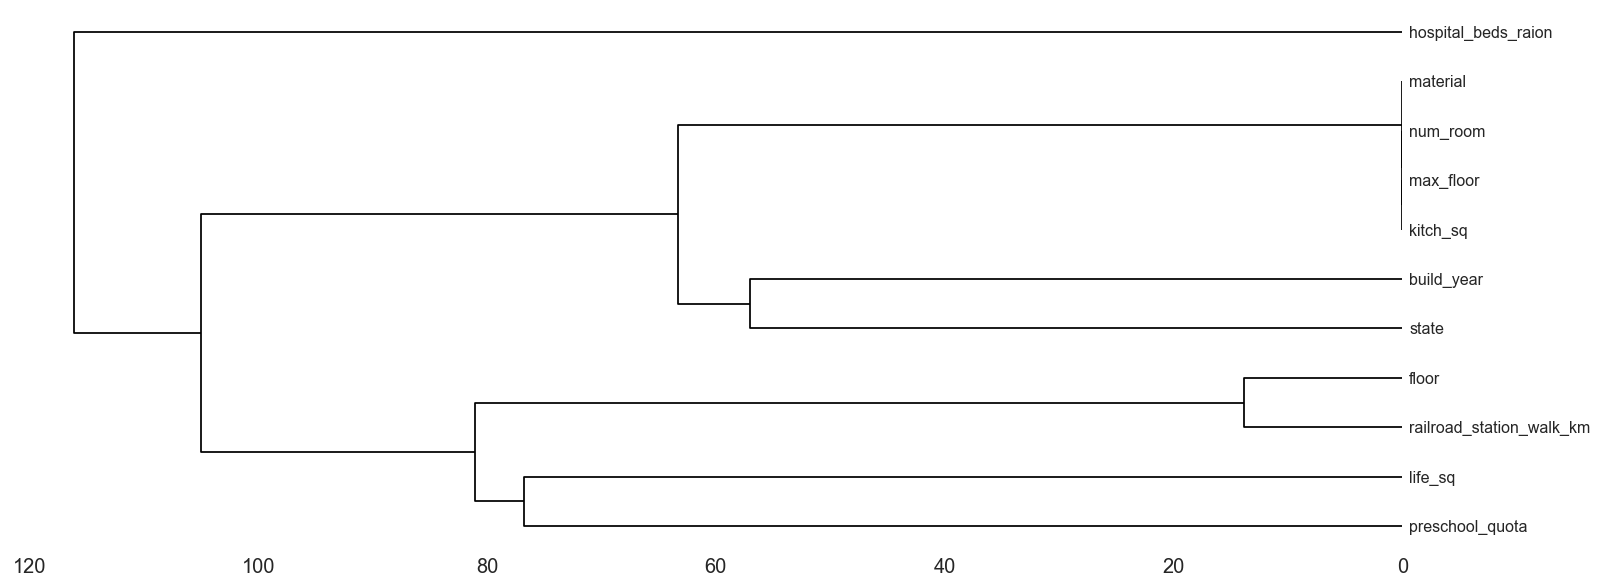

In [20]:
import missingno as msno
msno.dendrogram(train_data_features.loc[:, train_data_features.isnull().any()],orientation='left')

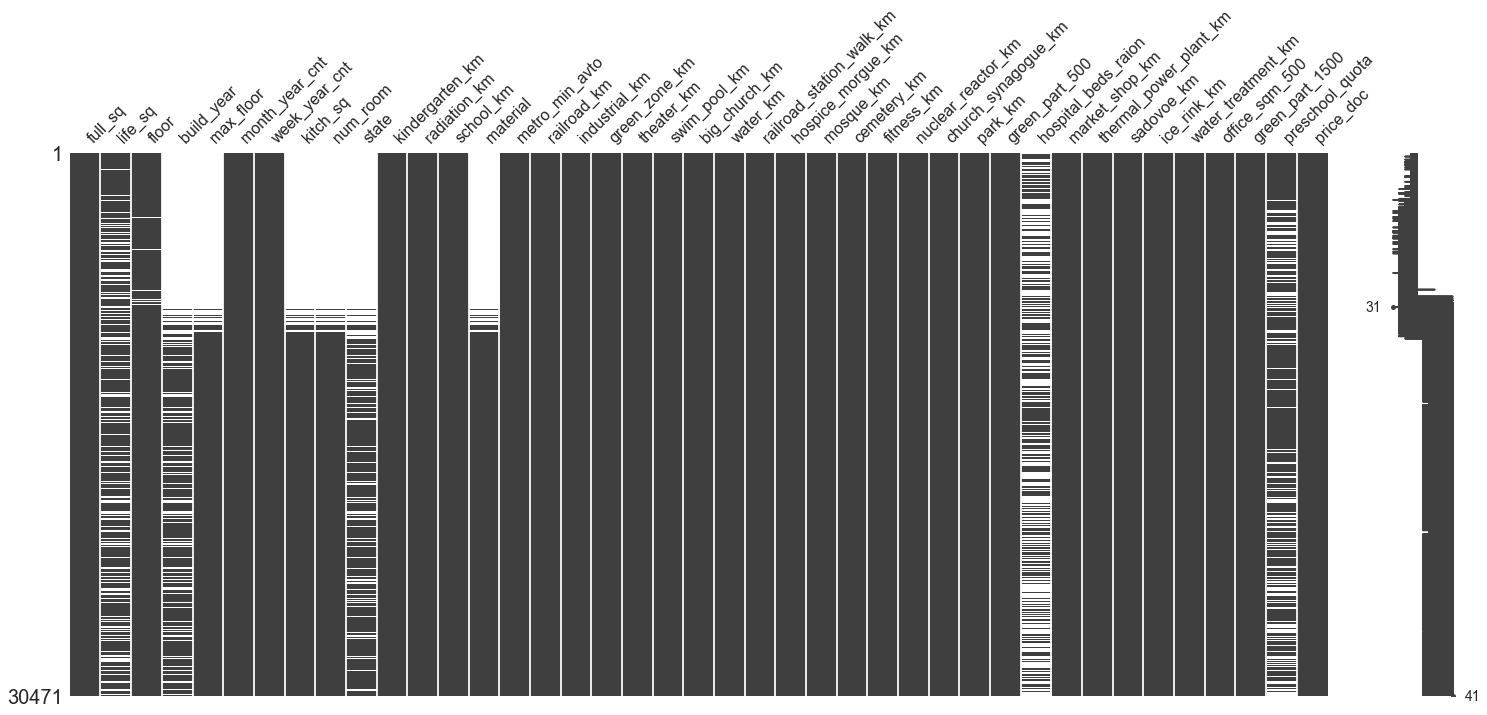

In [48]:
msno.matrix(train_data_features)

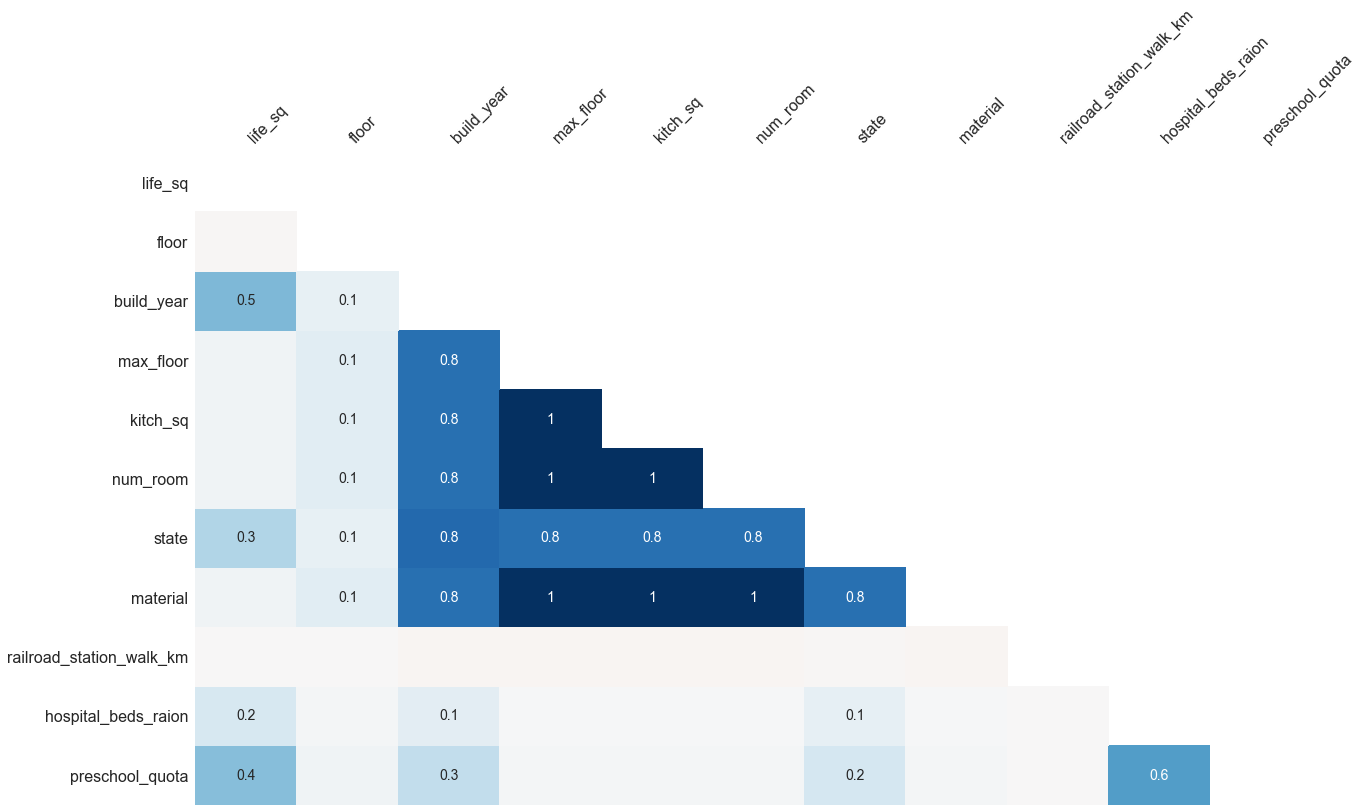

In [23]:
msno.heatmap(train_data_features.loc[:, train_data_features.isnull().any()])

# Fancy impute

## Compare different methods

In [29]:
impu_df =train_data_features.loc[:, train_data_features.isnull().any()]

In [30]:
impu_df_test = impu_df.dropna(how='any',axis=0)

In [44]:
X = impu_df_test.head(1000).values
test_col_name = 'num_room'
test_col = list(impu_df_test.columns).index(test_col_name)
missing_ratio = sum(train_data_features[test_col_name].isnull())/float(train_data_features.shape[0])

In [45]:
n_row = X.shape[0]
missing_mask = np.random.choice(range(n_row),int(n_row*missing_ratio))
X_incomplete = X.copy()
X_incomplete[missing_mask,test_col] = np.nan

In [62]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE, SimpleFill, MatrixFactorization

def cmpImpute(X,X_incomplete,missing_mask,test_col_name,methods):
#     methods = ['MICE','Soft','KNN','Simple','MF']
    
    # X is the complete data matrix
    # X_incomplete has the same values as X except a subset have been replace with NaN

    # Use 3 nearest rows which have a feature to fill in each row's missing features
    mses = []
    for method in methods:
        if method == 'KNN':
            X_filled = KNN(k=4).complete(X_incomplete)
        elif method == 'Soft':
            X_filled = SoftImpute().complete(X_incomplete)
        elif method == 'MICE':        
            X_filled = MICE().complete(X_incomplete)
        elif method == 'Simple':
            X_filled = SimpleFill(fill_method='median').complete(X_incomplete)
        elif method == 'MF':
            X_filled = MatrixFactorization().complete(X_incomplete)
        mse = ((X_filled[missing_mask] - X[missing_mask]) ** 2).mean()
        mses.append(mse)
    
    df = pd.DataFrame(mses).T
    df.columns = methods
    df.index = [test_col_name]
#     df.loc[test_col_name,methods] = mses
#     df.index = [test_col_name]


    # matrix completion using convex optimization to find low-rank solution
    # that still matches observed values. Slow!
    # X_filled_nnm = NuclearNormMinimization().complete(X_incomplete_normalized)

    # Instead of solving the nuclear norm objective directly, instead
    # induce sparsity using singular value thresholding
#     X_filled_softimpute = SoftImpute().complete(X_incomplete)


#     X_filled_mice = MICE().complete(X_incomplete)

#     X_filled_simple = SimpleFill().complete(X_incomplete)

#     X_filled_mf = MatrixFactorization().complete(X_incomplete)
    
    # print mean squared error for the three imputation methods above
    # nnm_mse = ((X_filled_nnm[missing_mask] - X[missing_mask]) ** 2).mean()
    # print("Nuclear norm minimization MSE: %f" % nnm_mse)

#     softImpute_mse = ((X_filled_softimpute[missing_mask] - X[missing_mask]) ** 2).mean()
#     print("SoftImpute MSE: %f" % softImpute_mse)

#     knn_mse = ((X_filled_knn[missing_mask] - X[missing_mask]) ** 2).mean()
#     print("knnImpute MSE: %f" % knn_mse)

#     mice_mse = ((X_filled_mice[missing_mask] - X[missing_mask]) ** 2).mean()
#     print("MICE MSE: %f" % mice_mse)

#     simple_mse = ((X_filled_simple[missing_mask] - X[missing_mask]) ** 2).mean()
#     print("Simple MSE: %f" % simple_mse)

#     mf_mse = ((X_filled_mf[missing_mask] - X[missing_mask]) ** 2).mean()
    return(df)

In [64]:
methods = ['MICE','KNN','Simple']
#methods = ['MICE','Soft','KNN','Simple']
# methods = ['MICE','KNN']
cmpImpute(X,X_incomplete,missing_mask,test_col_name,methods)

[MICE] Completing matrix with shape (1000, 11)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.002
[MICE] Starting imputation round 3/110, elapsed time 0.003
[MICE] Starting imputation round 4/110, elapsed time 0.004
[MICE] Starting imputation round 5/110, elapsed time 0.005
[MICE] Starting imputation round 6/110, elapsed time 0.006
[MICE] Starting imputation round 7/110, elapsed time 0.007
[MICE] Starting imputation round 8/110, elapsed time 0.008
[MICE] Starting imputation round 9/110, elapsed time 0.009
[MICE] Starting imputation round 10/110, elapsed time 0.010
[MICE] Starting imputation round 11/110, elapsed time 0.011
[MICE] Starting imputation round 12/110, elapsed time 0.012
[MICE] Starting imputation round 13/110, elapsed time 0.013
[MICE] Starting imputation round 14/110, elapsed time 0.015
[MICE] Starting imputation round 15/110, elapsed time 0.016
[MICE] Starting imputation round 16/110, elapsed time 0.017
[M

,MICE,KNN,Simple
num_room,0.05629,0.037053,0.055877


## Impute data

In [65]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

/Users/FYB/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
# forward selection function
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                        ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [28]:
#forward selection testing

model = forward_selected(non_missing[['full_sq', 'life_sq','floor','build_year','max_floor','price_doc']], 'price_doc')

print model.model.formula


print model.rsquared_adj


price_doc ~ full_sq + life_sq + floor + max_floor + 1
0.136126599567


In [29]:
#forward selection testing

model = forward_selected(non_missing[['full_sq', 'life_sq','floor','build_year','max_floor','month_year_cnt','week_year_cnt'
,'kitch_sq','num_room','state','kindergarten_km','price_doc']], 'price_doc')

print model.model.formula


print model.rsquared_adj

price_doc ~ num_room + full_sq + kindergarten_km + floor + month_year_cnt + state + life_sq + max_floor + build_year + week_year_cnt + kitch_sq + 1
0.253638554167


In [20]:
#forward selection testing

model = forward_selected(non_missing, 'price_doc')

print model.model.formula


print model.rsquared_adj

price_doc ~ num_room + sadovoe_km + full_sq + floor + radiation_km + month_year_cnt + nuclear_reactor_km + life_sq + hospital_beds_raion + material + industrial_km + max_floor + state + fitness_km + ice_rink_km + swim_pool_km + railroad_km + green_zone_km + railroad_station_walk_km + cemetery_km + theater_km + water_treatment_km + metro_min_avto + park_km + green_part_500 + water_km + office_sqm_500 + green_part_1500 + hospice_morgue_km + school_km + week_year_cnt + kitch_sq + build_year + market_shop_km + 1
0.345421161243


In [21]:
non_missing.to_csv('non_missing.csv')

In [13]:
non_missing_test.to_csv('non_missing_test.csv')

In [33]:
non_missing_test.head()

,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,green_part_500,hospital_beds_raion,market_shop_km,thermal_power_plant_km,sadovoe_km,ice_rink_km,water_treatment_km,office_sqm_500,green_part_1500,preschool_quota
0,39.0,20.7,2.0,1998.0,9.0,396,80,8.9,1.0,3.0,...,42.22,990.0,5.353674,8.957780,22.790985,11.810839,0.967696,0,20.14,11926.0
1,79.2,30.4,8.0,0.0,17.0,396,80,1.0,3.0,1.0,...,86.33,990.0,8.156185,10.039833,19.692960,4.438242,16.049420,0,59.28,3062.0
2,40.5,25.1,3.0,1960.0,5.0,396,80,4.8,2.0,2.0,...,0.00,1548.0,0.644830,3.760642,8.090528,3.131143,11.749900,0,30.97,2232.0
3,62.8,36.0,17.0,2016.0,17.0,396,80,62.8,2.0,3.0,...,22.01,990.0,11.112624,13.345715,25.062928,15.200509,5.061917,0,28.82,3062.0
4,40.0,40.0,17.0,0.0,17.0,396,80,1.0,1.0,1.0,...,3.33,990.0,6.433794,10.102328,19.868997,2.715850,16.784630,0,43.85,3062.0


In [35]:
non_missing.columns

Index([u'full_sq', u'life_sq', u'floor', u'build_year', u'max_floor',
       u'month_year_cnt', u'week_year_cnt', u'kitch_sq', u'num_room', u'state',
       u'kindergarten_km', u'radiation_km', u'school_km', u'material',
       u'metro_min_avto', u'railroad_km', u'industrial_km', u'green_zone_km',
       u'theater_km', u'swim_pool_km', u'big_church_km', u'water_km',
       u'railroad_station_walk_km', u'hospice_morgue_km', u'mosque_km',
       u'cemetery_km', u'fitness_km', u'nuclear_reactor_km',
       u'church_synagogue_km', u'park_km', u'green_part_500',
       u'hospital_beds_raion', u'market_shop_km', u'thermal_power_plant_km',
       u'sadovoe_km', u'ice_rink_km', u'water_treatment_km', u'office_sqm_500',
       u'green_part_1500', u'preschool_quota', u'price_doc'],
      dtype='object')

In [38]:
non_missing.iloc[1,  :-1,]

full_sq                       34.000000
life_sq                       19.000000
floor                          3.000000
build_year                  1979.000000
max_floor                     12.000000
month_year_cnt                 3.000000
week_year_cnt                  2.000000
kitch_sq                       6.000000
num_room                       2.000000
state                          2.000000
kindergarten_km                0.147754
radiation_km                   2.724295
school_km                      0.273345
material                       1.000000
metro_min_avto                 0.936700
railroad_km                    0.694536
industrial_km                  0.966479
green_zone_km                  0.065321
theater_km                     6.829889
swim_pool_km                   2.000154
big_church_km                  0.967821
water_km                       0.698081
railroad_station_walk_km       3.411993
hospice_morgue_km              2.543747
mosque_km                      4.841544


In [67]:
# import numpy as np
# import sklearn.model_selection as ms


# # divide 6 samples into 3 parts
# sample = np.array(range(non_missing.shape[0]))
# print('All data: {}'.format(sample))
# ms_k3 = ms.KFold(n_splits=3)
# for train_idx, val_idx in ms_k3.split(sample): 
#     #print('Train:', train_idx, 'Validation:', val_idx)
#     model= forward_selected(non_missing.iloc[train_idx,  :-1], non_missing.iloc[train_idx, -1])
#     y_hat = model.predict(non_missing.iloc[val_idx, :-1])
#     np.mean((non_missing[val_idx, 'price_doc'] - y_hat)**2)

In [ ]:
AIC = -log(L) + 2 * p
BIC = -log(L) + log(nrow)*p
 -log(L) + k*p